In [ ]:
# Kategori bazında event sayısı ile session_value ilişkisi
cat_event_counts = df.groupby(['category_id','user_session']).size().reset_index(name='event_count')
cat_event_values = df.groupby(['category_id','user_session'])['session_value'].first().reset_index()
cat_event_merged = pd.merge(cat_event_counts, cat_event_values, on=['category_id','user_session'])
plt.figure(figsize=(18, 8))
for cat in cat_event_merged['category_id'].unique()[:10]:
    sub = cat_event_merged[cat_event_merged['category_id']==cat]
    plt.scatter(sub['event_count'], sub['session_value'], alpha=0.5, label=cat)
plt.xlabel('Event Sayısı (Session bazında)')
plt.ylabel('Session Value')
plt.title('Kategori Bazında Event Sayısı ile Session Value İlişkisi (İlk 10 Kategori)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

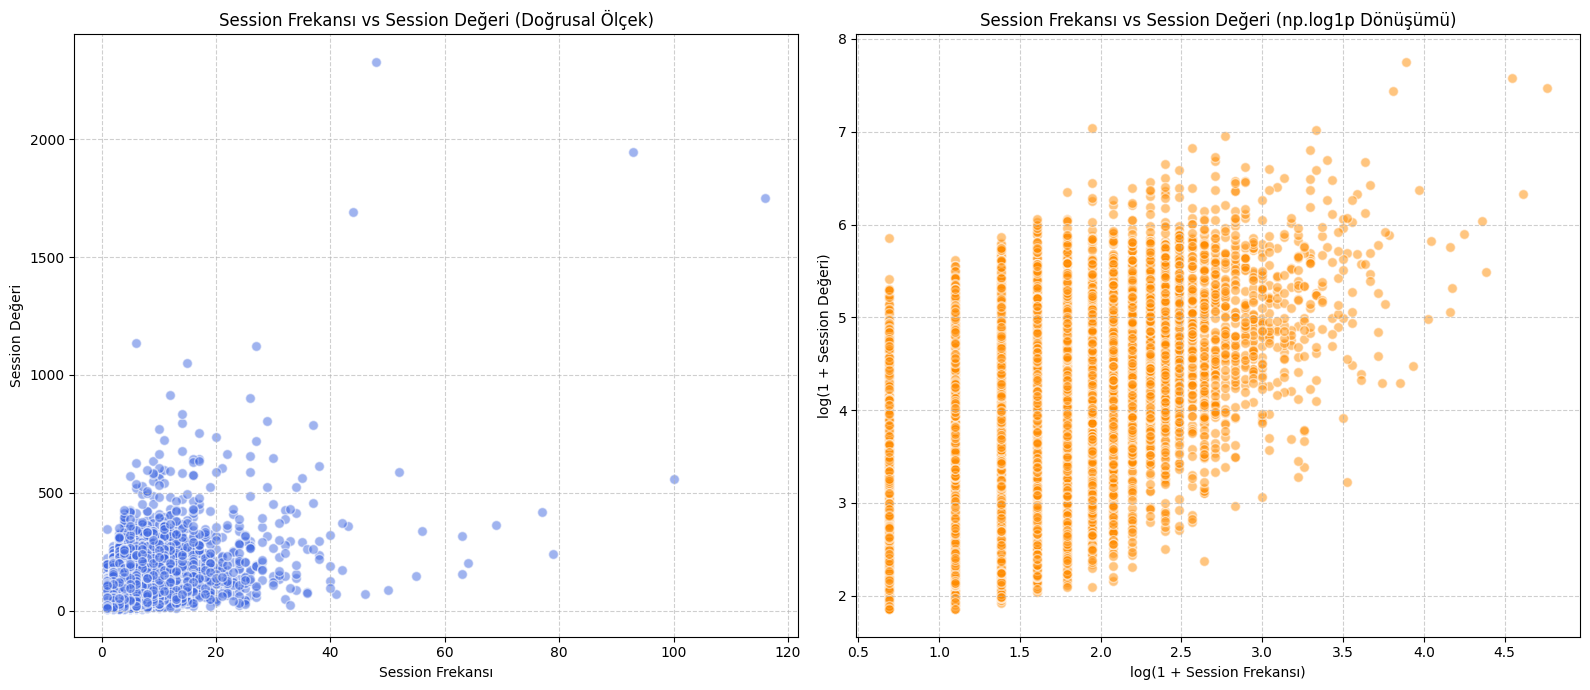

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Veri dosyasını yükle
# Not: 'train.csv' dosyasının kodun çalıştığı dizinde olduğundan emin olun.
try:
    df = pd.read_csv('train.csv')
except FileNotFoundError:
    print("Hata: 'train.csv' dosyası bulunamadı. Lütfen dosyanın doğru yolda olduğundan emin olun.")
    # Örnek bir DataFrame oluşturarak kodun çalışmasını sağlıyoruz
    data = {'user_session': ['s1', 's1', 's2', 's3', 's3', 's3', 's4'],
            'session_value': [10.5, 10.5, 25.0, 5.2, 5.2, 5.2, 80.0]}
    df = pd.DataFrame(data)


# Seans frekansını ve her seansın 'session_value' değerini hesapla
freq_df = df.groupby('user_session').size().reset_index(name='frequency')
value_df = df.groupby('user_session')['session_value'].first().reset_index()
freq_value_df = pd.merge(freq_df, value_df, on='user_session')

# Grafik için figürü oluştur
plt.figure(figsize=(16, 7))

# 1. Normal saçılım grafiği (değişiklik yok)
plt.subplot(1, 2, 1)
plt.scatter(freq_value_df['frequency'], freq_value_df['session_value'], alpha=0.5, color='royalblue', edgecolors='w', s=50)
plt.xlabel('Session Frekansı')
plt.ylabel('Session Değeri')
plt.title('Session Frekansı vs Session Değeri (Doğrusal Ölçek)')
plt.grid(True, linestyle='--', alpha=0.6)

# 2. np.log1p ile dönüştürülmüş saçılım grafiği
plt.subplot(1, 2, 2)
# Veriyi np.log1p ile dönüştür
log_frequency = np.log1p(freq_value_df['frequency'])
log_session_value = np.log1p(freq_value_df['session_value'])

plt.scatter(log_frequency, log_session_value, alpha=0.5, color='darkorange', edgecolors='w', s=50)
plt.xlabel('log(1 + Session Frekansı)')
plt.ylabel('log(1 + Session Değeri)')
plt.title('Session Frekansı vs Session Değeri (np.log1p Dönüşümü)')
plt.grid(True, linestyle='--', alpha=0.6)

# Grafikleri göster
plt.tight_layout()
plt.savefig('frequency_vs_session_value_comparison.png')
plt.show()

In [43]:
# train_features.csv dosyasındaki özellikler ile session_value arasında korelasyon analizi

# train_features.csv dosyasını oku
features_df = pd.read_csv('train_features.csv')

features_df.drop(columns=['user_session', "user_id", "event_pattern", "first_event_type", "last_event_type"], inplace=True)

# Korelasyonları hesapla
correlations = features_df.corrwith(features_df['session_value']).sort_values(ascending=False)

print("train_features.csv'deki sayısal özellikler ile session_value korelasyonları:")
print(correlations)

train_features.csv'deki sayısal özellikler ile session_value korelasyonları:
session_value               1.000000
buy_count                   0.843656
conversion                  0.690245
ends_with_buy               0.659572
buy_ratio                   0.606518
unique_products             0.542484
total_events                0.539518
unique_categories           0.535605
add_cart_count              0.355687
session_duration_seconds    0.239316
session_duration_minutes    0.239316
remove_cart_count           0.201738
max_time_between_events     0.195854
has_popular_category        0.173335
net_cart_adds               0.112571
view_count                  0.099266
avg_time_between_events     0.073414
add_cart_ratio              0.061223
is_morning                  0.046568
is_weekend                  0.017210
day_of_week                -0.000121
min_time_between_events    -0.003837
cart_abandonment           -0.031845
hour                       -0.043562
is_evening                 -0.05519

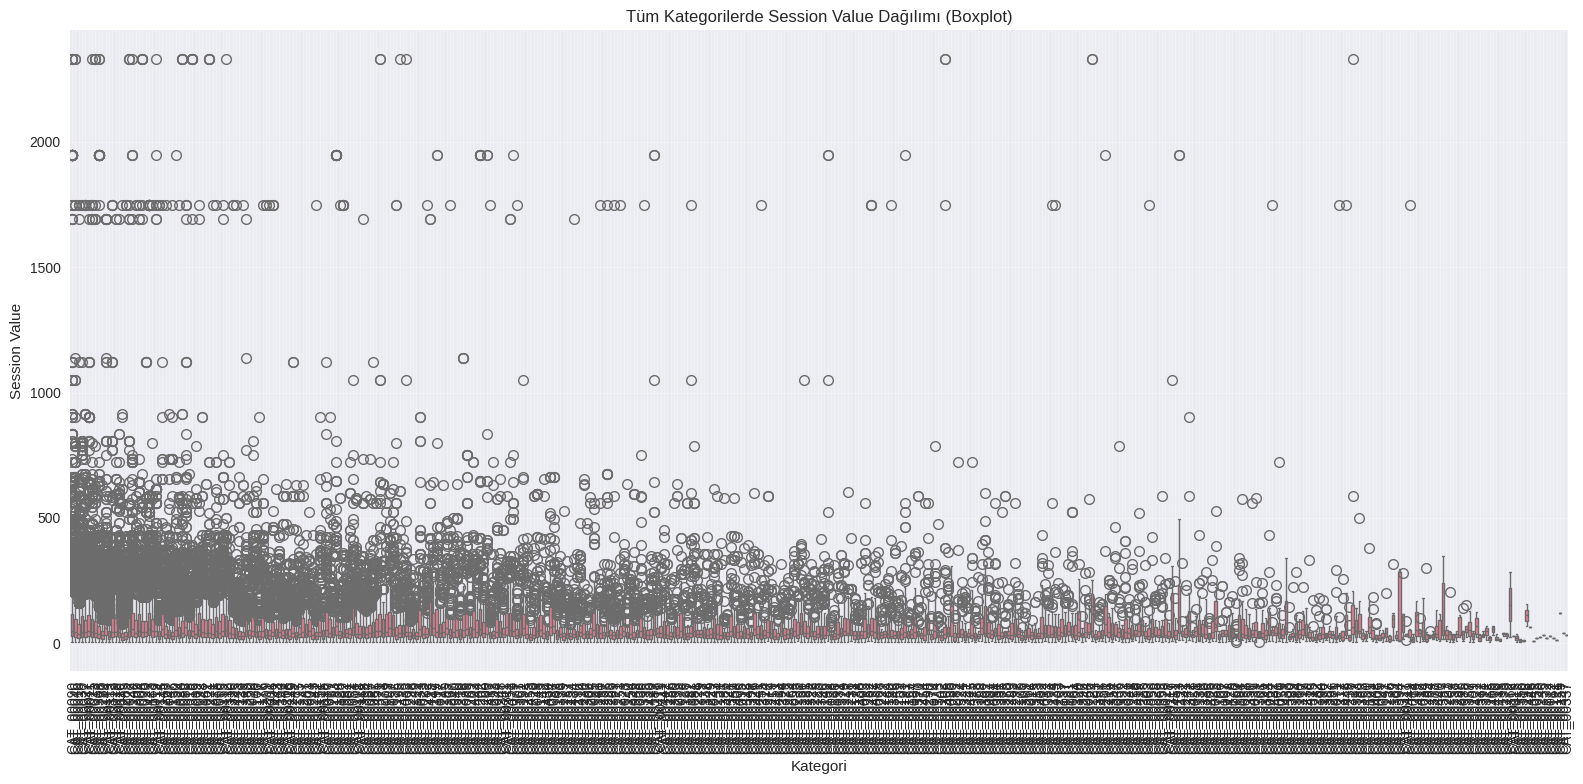

             count        mean   median         std    min      max       iqr
category_id                                                                  
CAT_00317       11  320.775455   64.060  686.033412   6.04  2328.66  115.7350
CAT_00193       26  285.991154   89.815  509.081408  12.61  1946.93  184.9125
CAT_00449        7  277.264286   27.190  649.367465   7.38  1749.42   26.3900
CAT_00224       37  214.534595   50.120  518.681464   9.65  2328.66  169.7800
CAT_00446       12  211.444167   50.125  487.900269  21.70  1749.42   80.6900
CAT_00306       57  173.833684   35.250  478.765437   5.98  2328.66   42.7900
CAT_00212       13  163.851538   27.710  476.980075  10.39  1749.42   11.6400
CAT_00184      426  158.253333   68.115  325.100844   5.38  1946.93  112.9275
CAT_00362        2  154.520000  154.520  184.979134  23.72   285.32  130.8000
CAT_00202      240  152.812708   55.605  331.171426   5.38  1946.93  102.1450


In [9]:
# Tüm kategoriler için session_value analizleri
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('train.csv')
plt.figure(figsize=(16, 8))
order = df['category_id'].value_counts().index
sns.boxplot(x='category_id', y='session_value', data=df, order=order)
plt.xticks(rotation=90)
plt.title('Tüm Kategorilerde Session Value Dağılımı (Boxplot)')
plt.xlabel('Kategori')
plt.ylabel('Session Value')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Kategori bazında session_value istatistikleri ve korelasyon
cat_stats = df.groupby('category_id')['session_value'].agg(['count','mean','median','std','min','max'])
cat_stats['iqr'] = df.groupby('category_id')['session_value'].quantile(0.75) - df.groupby('category_id')['session_value'].quantile(0.25)
print(cat_stats.sort_values('mean', ascending=False).head(10))

In [14]:
# Ortalama, maksimum ve minimum kategori eleman sayısı
category_counts = df['category_id'].value_counts()
ortalama = category_counts.mean()
maksimum = category_counts.max()
minimum = category_counts.min()

print(f"Ortalama bir kategoride {ortalama:.2f} eleman var.")
print(f"Maksimum kategori eleman sayısı: {maksimum}")
print(f"Minimum kategori eleman sayısı: {minimum}")

# 150 elemanın altında olan kategoriler
alt_150 = category_counts[category_counts < 50]
print(f"\n100 elemanın altında olan kategori sayısı: {len(alt_150)}")
print(f"Bu kategorilerdeki toplam eleman sayısı: {alt_150.sum()}")

Ortalama bir kategoride 315.22 eleman var.
Maksimum kategori eleman sayısı: 6861
Minimum kategori eleman sayısı: 1

100 elemanın altında olan kategori sayısı: 170
Bu kategorilerdeki toplam eleman sayısı: 3285


# Kategori ve Session Value İlişki Analizi
Bu notebook, tüm kategoriler (`category_id`) ile `session_value` arasındaki ilişkiyi detaylı saçılım grafikleri ve istatistiklerle analiz eder.

# CAT_00030 ve Session Value İlişki Analizi

Bu notebook, CAT_00030 kategorisi ile session_value arasındaki ilişkiyi detaylı saçılım grafikleri ile analiz eder.

In [2]:
# Gerekli kütüphaneleri import edelim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Grafik ayarları
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [3]:
# Veriyi yükleyelim
print("Veri yükleniyor...")
df = pd.read_csv('train.csv')
print(f"Toplam veri boyutu: {df.shape}")
print(f"\nVeri türleri:")
print(df.dtypes)
print(f"\nİlk 5 satır:")
df.head()

Veri yükleniyor...
Toplam veri boyutu: (141219, 7)

Veri türleri:
event_time        object
event_type        object
product_id        object
category_id       object
user_id           object
user_session      object
session_value    float64
dtype: object

İlk 5 satır:


,event_time,event_type,product_id,category_id,user_id,user_session,session_value
0,2025-06-19 10:23:07+00:00,ADD_CART,PROD_011223,CAT_00054,USER_097562,SESSION_158779,90.29
1,2025-06-07 21:34:45+00:00,ADD_CART,PROD_005519,CAT_00144,USER_006535,SESSION_029987,16.39
2,2025-06-21 21:29:09+00:00,ADD_CART,PROD_000577,CAT_00273,USER_047199,SESSION_022134,64.27
3,2025-06-09 09:10:20+00:00,ADD_CART,PROD_019235,CAT_00442,USER_082028,SESSION_161308,41.67
4,2025-06-19 11:13:58+00:00,ADD_CART,PROD_001702,CAT_00025,USER_096574,SESSION_182859,86.11


In [4]:
# CAT_00030 kategorisindeki verileri filtreleyelim
cat_00030_data = df[df['category_id'] == 'CAT_00030'].copy()

print(f"CAT_00030 kategorisindeki toplam kayıt sayısı: {len(cat_00030_data)}")
print(f"Toplam verinin %{len(cat_00030_data)/len(df)*100:.2f}'ini oluşturuyor")

# Session_value için temel istatistikler
print(f"\nCAT_00030 için session_value istatistikleri:")
print(cat_00030_data['session_value'].describe())

CAT_00030 kategorisindeki toplam kayıt sayısı: 4660
Toplam verinin %3.30'ini oluşturuyor

CAT_00030 için session_value istatistikleri:
count    4660.000000
mean       89.040479
std       121.565916
min         5.380000
25%        26.455000
50%        46.450000
75%       108.060000
max      1749.420000
Name: session_value, dtype: float64


In [16]:
# Event type dağılımını kontrol edelim
print("CAT_00030 kategorisinde event type dağılımı:")
print(cat_00030_data['event_type'].value_counts())

# Unique session sayısı
unique_sessions = cat_00030_data['user_session'].nunique()
print(f"\nCAT_00030'da benzersiz session sayısı: {unique_sessions}")

# Unique user sayısı
unique_users = cat_00030_data['user_id'].nunique()
print(f"CAT_00030'da benzersiz kullanıcı sayısı: {unique_users}")

CAT_00030 kategorisinde event type dağılımı:
event_type
VIEW           1570
ADD_CART       1449
REMOVE_CART    1148
BUY             493
Name: count, dtype: int64

CAT_00030'da benzersiz session sayısı: 2511
CAT_00030'da benzersiz kullanıcı sayısı: 1938


In [17]:
# Session bazında aggregate veri oluşturalım
session_agg = cat_00030_data.groupby('user_session').agg({
    'session_value': ['first', 'count'],
    'event_type': lambda x: x.value_counts().to_dict(),
    'product_id': 'nunique',
    'user_id': 'first'
}).reset_index()

# Column isimlerini düzenleyelim
session_agg.columns = ['user_session', 'session_value', 'event_count', 'event_types', 'unique_products', 'user_id']

print(f"Session bazında aggregate veri boyutu: {session_agg.shape}")
print(f"\nSession bazında session_value istatistikleri:")
print(session_agg['session_value'].describe())

Session bazında aggregate veri boyutu: (2511, 6)

Session bazında session_value istatistikleri:
count    2511.000000
mean       65.746826
std        88.612393
min         5.380000
25%        22.350000
50%        38.710000
75%        72.835000
max      1749.420000
Name: session_value, dtype: float64


## 1. Temel Saçılım Grafikleri

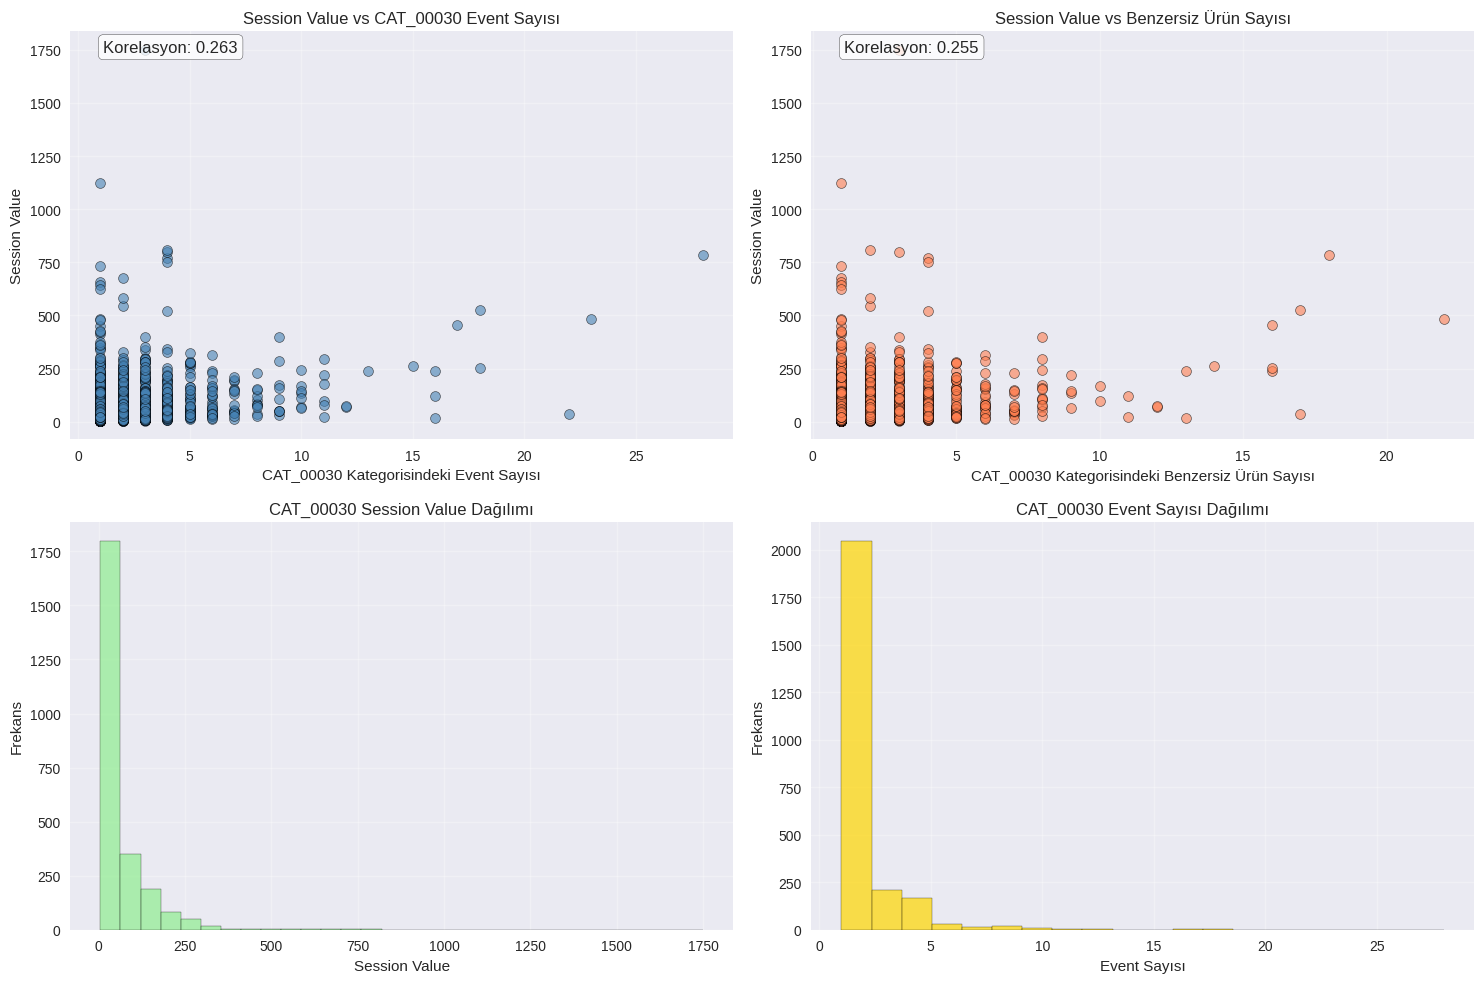

In [7]:
# 1. Ana saçılım grafiği - Session Value vs Event Count
plt.figure(figsize=(15, 10))

# Subplot 1: Session Value vs Event Count
plt.subplot(2, 2, 1)
plt.scatter(session_agg['event_count'], session_agg['session_value'], 
           alpha=0.6, s=50, c='steelblue', edgecolors='black', linewidth=0.5)
plt.xlabel('CAT_00030 Kategorisindeki Event Sayısı')
plt.ylabel('Session Value')
plt.title('Session Value vs CAT_00030 Event Sayısı')
plt.grid(True, alpha=0.3)

# Korelasyon hesapla
correlation = session_agg['event_count'].corr(session_agg['session_value'])
plt.text(0.05, 0.95, f'Korelasyon: {correlation:.3f}', 
         transform=plt.gca().transAxes, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Subplot 2: Session Value vs Unique Products
plt.subplot(2, 2, 2)
plt.scatter(session_agg['unique_products'], session_agg['session_value'], 
           alpha=0.6, s=50, c='coral', edgecolors='black', linewidth=0.5)
plt.xlabel('CAT_00030 Kategorisindeki Benzersiz Ürün Sayısı')
plt.ylabel('Session Value')
plt.title('Session Value vs Benzersiz Ürün Sayısı')
plt.grid(True, alpha=0.3)

correlation2 = session_agg['unique_products'].corr(session_agg['session_value'])
plt.text(0.05, 0.95, f'Korelasyon: {correlation2:.3f}', 
         transform=plt.gca().transAxes, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Subplot 3: Session Value histogram
plt.subplot(2, 2, 3)
plt.hist(session_agg['session_value'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
plt.xlabel('Session Value')
plt.ylabel('Frekans')
plt.title('CAT_00030 Session Value Dağılımı')
plt.grid(True, alpha=0.3)

# Subplot 4: Event Count histogram
plt.subplot(2, 2, 4)
plt.hist(session_agg['event_count'], bins=20, alpha=0.7, color='gold', edgecolor='black')
plt.xlabel('Event Sayısı')
plt.ylabel('Frekans')
plt.title('CAT_00030 Event Sayısı Dağılımı')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 2. Detaylı Event Type Bazlı Analiz

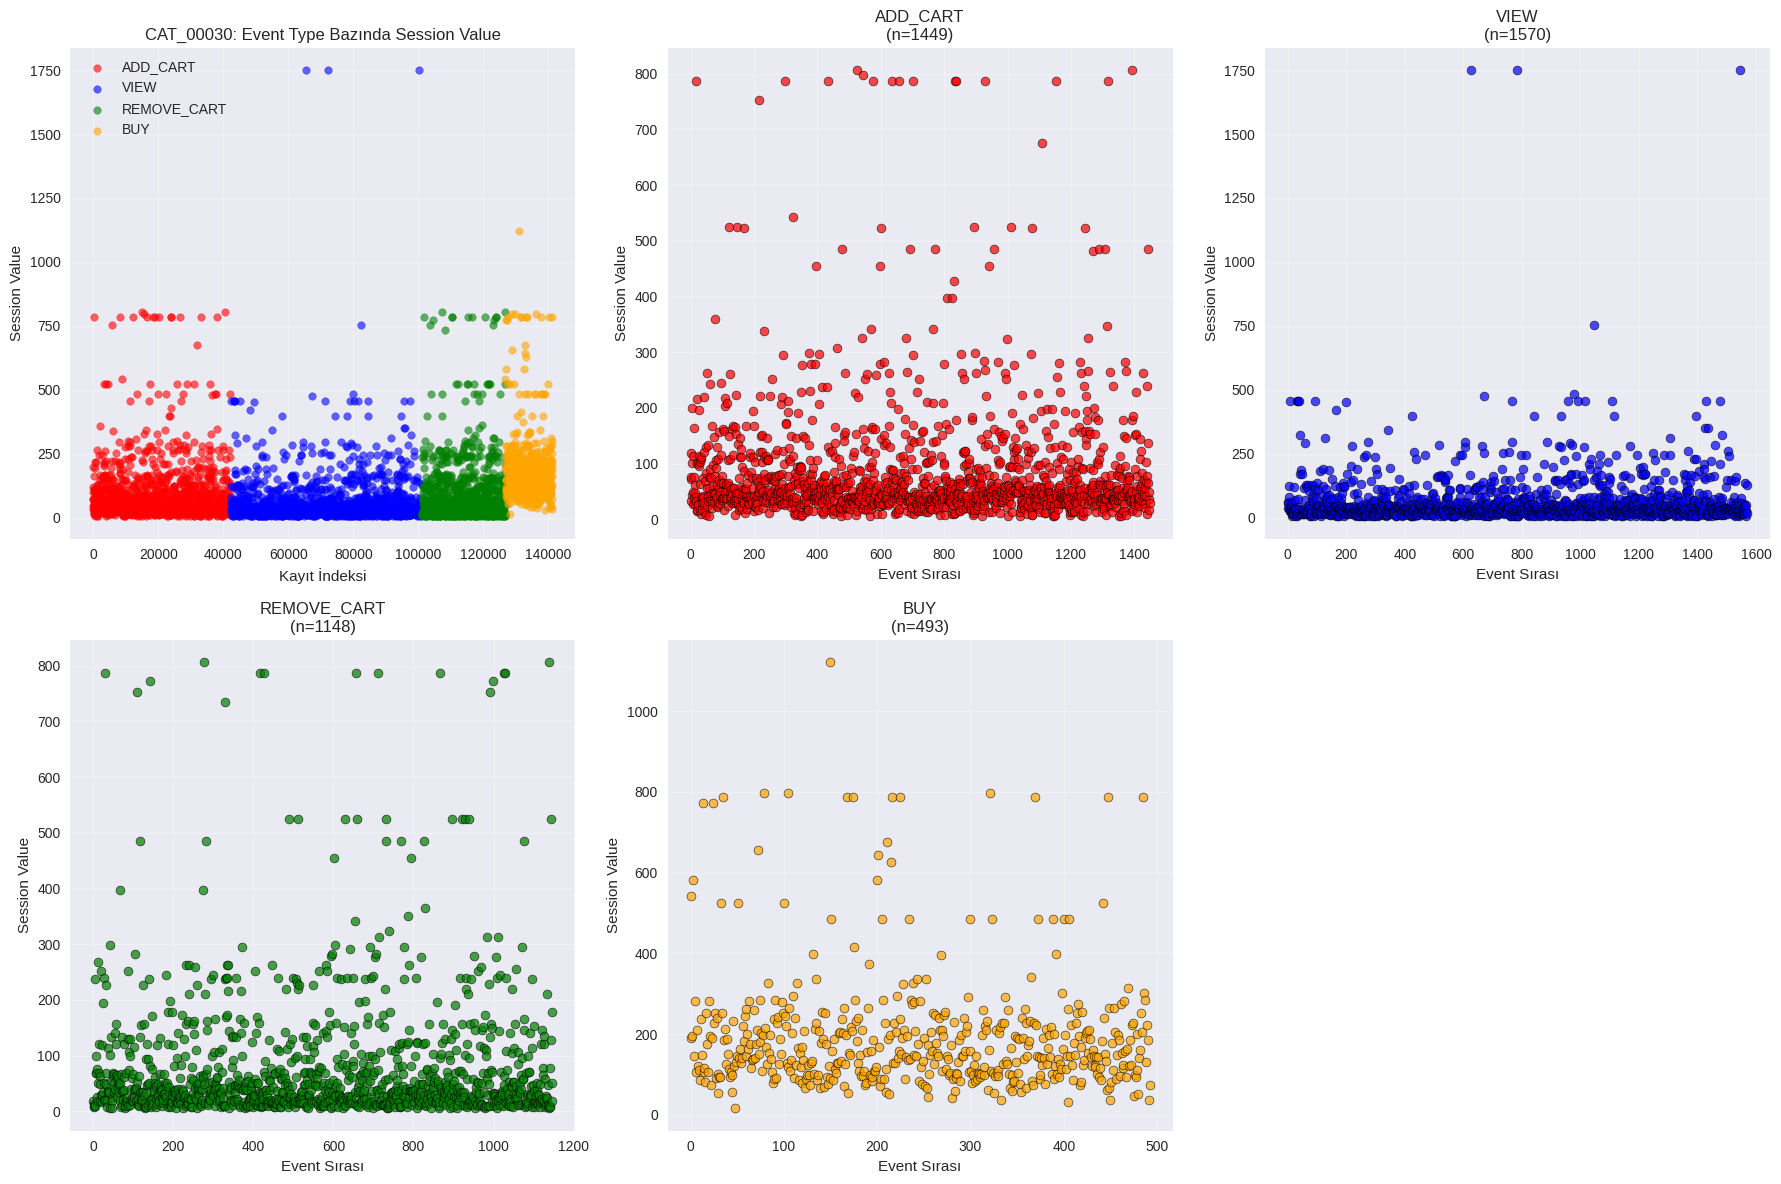

In [8]:
# Event type bazında detaylı analiz
plt.figure(figsize=(18, 12))

# Her event type için ayrı saçılım grafiği
event_types = cat_00030_data['event_type'].unique()
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']

# Subplot 1: Tüm event typelar bir arada
plt.subplot(2, 3, 1)
for i, event_type in enumerate(event_types):
    event_data = cat_00030_data[cat_00030_data['event_type'] == event_type]
    plt.scatter(event_data.index, event_data['session_value'], 
               alpha=0.6, s=30, label=event_type, color=colors[i % len(colors)])

plt.xlabel('Kayıt İndeksi')
plt.ylabel('Session Value')
plt.title('CAT_00030: Event Type Bazında Session Value')
plt.legend()
plt.grid(True, alpha=0.3)

# Her event type için ayrı subplot
for i, event_type in enumerate(event_types[:5]):
    plt.subplot(2, 3, i+2)
    event_data = cat_00030_data[cat_00030_data['event_type'] == event_type]
    
    # Session value vs event sırası
    plt.scatter(range(len(event_data)), event_data['session_value'], 
               alpha=0.7, s=40, color=colors[i % len(colors)], 
               edgecolors='black', linewidth=0.5)
    
    plt.xlabel('Event Sırası')
    plt.ylabel('Session Value')
    plt.title(f'{event_type}\n(n={len(event_data)})')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Session Value Aralıklarına Göre Analiz

In [ ]:
# Session value aralıklarına göre kategorize edelim
session_agg['value_category'] = pd.cut(session_agg['session_value'], 
                                      bins=[0, 25, 50, 100, 200, float('inf')],
                                      labels=['Düşük (0-25)', 'Orta-Düşük (25-50)', 
                                             'Orta (50-100)', 'Yüksek (100-200)', 
                                             'Çok Yüksek (200+)'])

plt.figure(figsize=(20, 12))

# Subplot 1: Value kategorilerine göre dağılım
plt.subplot(2, 4, 1)
value_counts = session_agg['value_category'].value_counts()
plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Session Value Kategorileri Dağılımı')

# Subplot 2: Box plot
plt.subplot(2, 4, 2)
session_agg.boxplot(column='session_value', ax=plt.gca())
plt.title('Session Value Box Plot')
plt.xticks([])

# Subplot 3-6: Her kategori için detaylı saçılım
categories = session_agg['value_category'].cat.categories
colors_cat = ['lightcoral', 'lightblue', 'lightgreen', 'gold', 'plum']

for i, category in enumerate(categories):
    if i < 4:  # İlk 4 kategori için
        plt.subplot(2, 4, i+3)
        cat_data = session_agg[session_agg['value_category'] == category]
        
        plt.scatter(cat_data['event_count'], cat_data['session_value'], 
                   alpha=0.7, s=60, color=colors_cat[i], 
                   edgecolors='black', linewidth=0.5)
        
        plt.xlabel('Event Sayısı')
        plt.ylabel('Session Value')
        plt.title(f'{category}\n(n={len(cat_data)})')
        plt.grid(True, alpha=0.3)

# Son kategori için ayrı subplot
plt.subplot(2, 4, 7)
if len(categories) > 4:
    cat_data = session_agg[session_agg['value_category'] == categories[4]]
    plt.scatter(cat_data['event_count'], cat_data['session_value'], 
               alpha=0.7, s=60, color=colors_cat[4], 
               edgecolors='black', linewidth=0.5)
    plt.xlabel('Event Sayısı')
    plt.ylabel('Session Value')
    plt.title(f'{categories[4]}\n(n={len(cat_data)})')
    plt.grid(True, alpha=0.3)

# Özet istatistikler
plt.subplot(2, 4, 8)
plt.axis('off')
stats_text = f"""
CAT_00030 Özet İstatistikler:

• Toplam Session: {len(session_agg)}
• Ortalama Value: {session_agg['session_value'].mean():.2f}
• Medyan Value: {session_agg['session_value'].median():.2f}
• Min Value: {session_agg['session_value'].min():.2f}
• Max Value: {session_agg['session_value'].max():.2f}
• Std Dev: {session_agg['session_value'].std():.2f}

• Ortalama Event/Session: {session_agg['event_count'].mean():.2f}
• Ortalama Ürün/Session: {session_agg['unique_products'].mean():.2f}

Korelasyonlar:
• Event Count vs Value: {correlation:.3f}
• Unique Products vs Value: {correlation2:.3f}
"""
plt.text(0.1, 0.9, stats_text, transform=plt.gca().transAxes, 
         fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

plt.tight_layout()
plt.show()

## 4. Zaman Bazlı Analiz

In [ ]:
# Event time'ı datetime'a çevirelim
cat_00030_data['event_time'] = pd.to_datetime(cat_00030_data['event_time'])
cat_00030_data['hour'] = cat_00030_data['event_time'].dt.hour
cat_00030_data['day'] = cat_00030_data['event_time'].dt.day
cat_00030_data['weekday'] = cat_00030_data['event_time'].dt.day_name()

plt.figure(figsize=(20, 10))

# Subplot 1: Saatlere göre session value
plt.subplot(2, 3, 1)
hourly_avg = cat_00030_data.groupby('hour')['session_value'].mean()
plt.scatter(hourly_avg.index, hourly_avg.values, s=100, alpha=0.7, color='navy')
plt.plot(hourly_avg.index, hourly_avg.values, color='red', alpha=0.5)
plt.xlabel('Saat')
plt.ylabel('Ortalama Session Value')
plt.title('Saatlere Göre Ortalama Session Value')
plt.grid(True, alpha=0.3)

# Subplot 2: Günlere göre session value
plt.subplot(2, 3, 2)
daily_avg = cat_00030_data.groupby('day')['session_value'].mean()
plt.scatter(daily_avg.index, daily_avg.values, s=100, alpha=0.7, color='darkgreen')
plt.plot(daily_avg.index, daily_avg.values, color='orange', alpha=0.5)
plt.xlabel('Gün')
plt.ylabel('Ortalama Session Value')
plt.title('Günlere Göre Ortalama Session Value')
plt.grid(True, alpha=0.3)

# Subplot 3: Hafta günlerine göre session value
plt.subplot(2, 3, 3)
weekday_avg = cat_00030_data.groupby('weekday')['session_value'].mean()
plt.scatter(range(len(weekday_avg)), weekday_avg.values, s=100, alpha=0.7, color='purple')
plt.plot(range(len(weekday_avg)), weekday_avg.values, color='yellow', alpha=0.5)
plt.xlabel('Hafta Günü')
plt.ylabel('Ortalama Session Value')
plt.title('Hafta Günlerine Göre Ortalama Session Value')
plt.xticks(range(len(weekday_avg)), weekday_avg.index, rotation=45)
plt.grid(True, alpha=0.3)

# Subplot 4: Saat bazında saçılım
plt.subplot(2, 3, 4)
hours = cat_00030_data['hour'].unique()
colors_time = plt.cm.viridis(np.linspace(0, 1, len(hours)))

for i, hour in enumerate(sorted(hours)):
    hour_data = cat_00030_data[cat_00030_data['hour'] == hour]
    plt.scatter([hour] * len(hour_data), hour_data['session_value'], 
               alpha=0.6, s=20, color=colors_time[i])

plt.xlabel('Saat')
plt.ylabel('Session Value')
plt.title('Saatlere Göre Session Value Dağılımı')
plt.grid(True, alpha=0.3)

# Subplot 5: Event count vs Session value (renk: saat)
plt.subplot(2, 3, 5)
scatter = plt.scatter(cat_00030_data.groupby('user_session')['user_session'].count(), 
                     cat_00030_data.groupby('user_session')['session_value'].first(),
                     c=cat_00030_data.groupby('user_session')['hour'].first(), 
                     cmap='coolwarm', alpha=0.7, s=50, edgecolors='black', linewidth=0.5)
plt.colorbar(scatter, label='Saat')
plt.xlabel('Session İçindeki Event Sayısı')
plt.ylabel('Session Value')
plt.title('Event Sayısı vs Session Value (Renk: Saat)')
plt.grid(True, alpha=0.3)

# Subplot 6: Zaman serisi
plt.subplot(2, 3, 6)
daily_data = cat_00030_data.groupby(cat_00030_data['event_time'].dt.date).agg({
    'session_value': ['mean', 'count']
})
daily_data.columns = ['avg_value', 'count']

plt.scatter(daily_data.index, daily_data['avg_value'], 
           s=daily_data['count']*2, alpha=0.7, color='red', edgecolors='black')
plt.xlabel('Tarih')
plt.ylabel('Ortalama Session Value')
plt.title('Günlük Ortalama Session Value\n(Nokta boyutu: Event sayısı)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Ürün Bazlı Detaylı Analiz

CAT_00030'da toplam 387 ürün var
En az 10 event'i olan ürün sayısı: 162


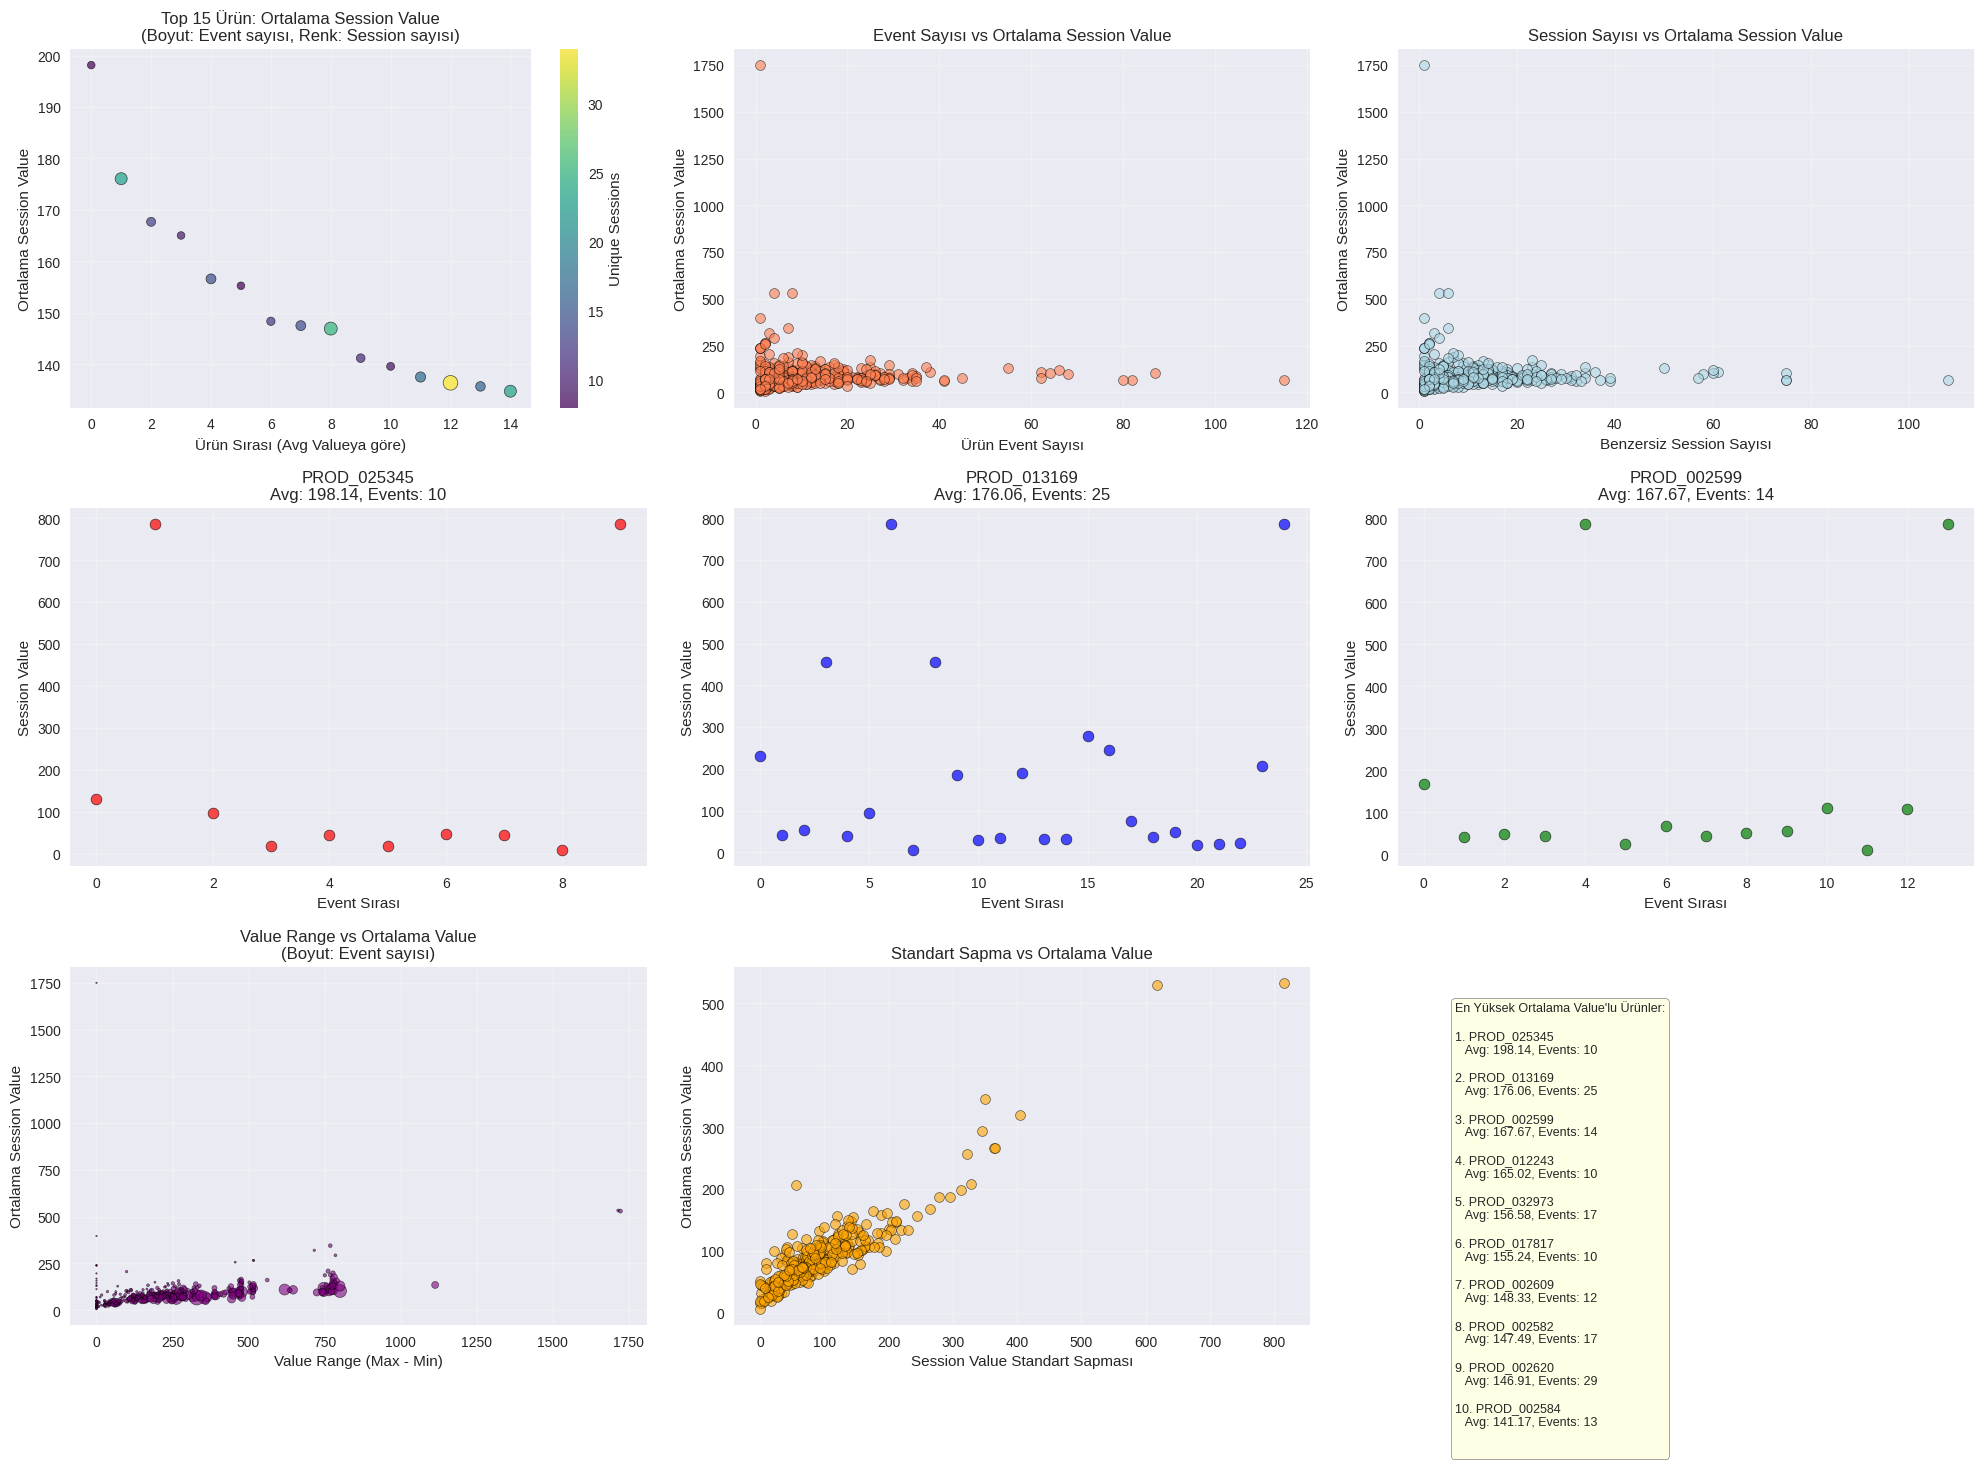

In [18]:
# CAT_00030 kategorisindeki ürünlerin analizi
product_analysis = cat_00030_data.groupby('product_id').agg({
    'session_value': ['mean', 'std', 'count', 'min', 'max'],
    'user_session': 'nunique',
    'user_id': 'nunique',
    'event_type': lambda x: x.value_counts().to_dict()
}).reset_index()

# Column isimlerini düzenle
product_analysis.columns = ['product_id', 'avg_value', 'std_value', 'event_count', 
                           'min_value', 'max_value', 'unique_sessions', 
                           'unique_users', 'event_types']

# En popüler ürünleri seçelim (en az 10 event olanlar)
popular_products = product_analysis[product_analysis['event_count'] >= 10].copy()
popular_products = popular_products.sort_values('avg_value', ascending=False)

print(f"CAT_00030'da toplam {len(product_analysis)} ürün var")
print(f"En az 10 event'i olan ürün sayısı: {len(popular_products)}")

plt.figure(figsize=(20, 15))

# Subplot 1: Ürün bazında ortalama session value
plt.subplot(3, 3, 1)
top_products = popular_products.head(15)
plt.scatter(range(len(top_products)), top_products['avg_value'], 
           s=top_products['event_count']*3, alpha=0.7, 
           c=top_products['unique_sessions'], cmap='viridis', 
           edgecolors='black', linewidth=0.5)
plt.xlabel('Ürün Sırası (Avg Valueya göre)')
plt.ylabel('Ortalama Session Value')
plt.title('Top 15 Ürün: Ortalama Session Value\n(Boyut: Event sayısı, Renk: Session sayısı)')
plt.colorbar(label='Unique Sessions')
plt.grid(True, alpha=0.3)

# Subplot 2: Event count vs Average session value
plt.subplot(3, 3, 2)
plt.scatter(product_analysis['event_count'], product_analysis['avg_value'], 
           alpha=0.6, s=50, color='coral', edgecolors='black', linewidth=0.5)
plt.xlabel('Ürün Event Sayısı')
plt.ylabel('Ortalama Session Value')
plt.title('Event Sayısı vs Ortalama Session Value')
plt.grid(True, alpha=0.3)

# Subplot 3: Unique sessions vs Average session value
plt.subplot(3, 3, 3)
plt.scatter(product_analysis['unique_sessions'], product_analysis['avg_value'], 
           alpha=0.6, s=50, color='lightblue', edgecolors='black', linewidth=0.5)
plt.xlabel('Benzersiz Session Sayısı')
plt.ylabel('Ortalama Session Value')
plt.title('Session Sayısı vs Ortalama Session Value')
plt.grid(True, alpha=0.3)

# Subplot 4-6: En yüksek value'lu ürünlerin detayı
top_3_products = popular_products.head(3)

for i, (_, product_row) in enumerate(top_3_products.iterrows()):
    plt.subplot(3, 3, i+4)
    product_id = product_row['product_id']
    product_data = cat_00030_data[cat_00030_data['product_id'] == product_id]
    
    plt.scatter(range(len(product_data)), product_data['session_value'], 
               alpha=0.7, s=60, color=['red', 'blue', 'green'][i], 
               edgecolors='black', linewidth=0.5)
    
    plt.xlabel('Event Sırası')
    plt.ylabel('Session Value')
    plt.title(f'{product_id}\nAvg: {product_row["avg_value"]:.2f}, Events: {product_row["event_count"]}')
    plt.grid(True, alpha=0.3)

# Subplot 7: Value range analizi
plt.subplot(3, 3, 7)
product_analysis['value_range'] = product_analysis['max_value'] - product_analysis['min_value']
plt.scatter(product_analysis['value_range'], product_analysis['avg_value'], 
           alpha=0.6, s=product_analysis['event_count'], 
           color='purple', edgecolors='black', linewidth=0.5)
plt.xlabel('Value Range (Max - Min)')
plt.ylabel('Ortalama Session Value')
plt.title('Value Range vs Ortalama Value\n(Boyut: Event sayısı)')
plt.grid(True, alpha=0.3)

# Subplot 8: Standard deviation analizi
plt.subplot(3, 3, 8)
# NaN değerleri filtreleyelim
valid_std = product_analysis.dropna(subset=['std_value'])
plt.scatter(valid_std['std_value'], valid_std['avg_value'], 
           alpha=0.6, s=50, color='orange', edgecolors='black', linewidth=0.5)
plt.xlabel('Session Value Standart Sapması')
plt.ylabel('Ortalama Session Value')
plt.title('Standart Sapma vs Ortalama Value')
plt.grid(True, alpha=0.3)


# Subplot 9: Top products summary
plt.subplot(3, 3, 9)
plt.axis('off')
summary_text = "En Yüksek Ortalama Value'lu Ürünler:\n\n"
for i, (_, row) in enumerate(top_products.head(10).iterrows()):
    summary_text += f"{i+1}. {row['product_id']}\n   Avg: {row['avg_value']:.2f}, Events: {row['event_count']}\n\n"

plt.text(0.1, 0.9, summary_text, transform=plt.gca().transAxes, 
         fontsize=9, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

plt.tight_layout()
plt.show()

## 6. İleri Düzey Korelasyon ve İstatistiksel Analiz

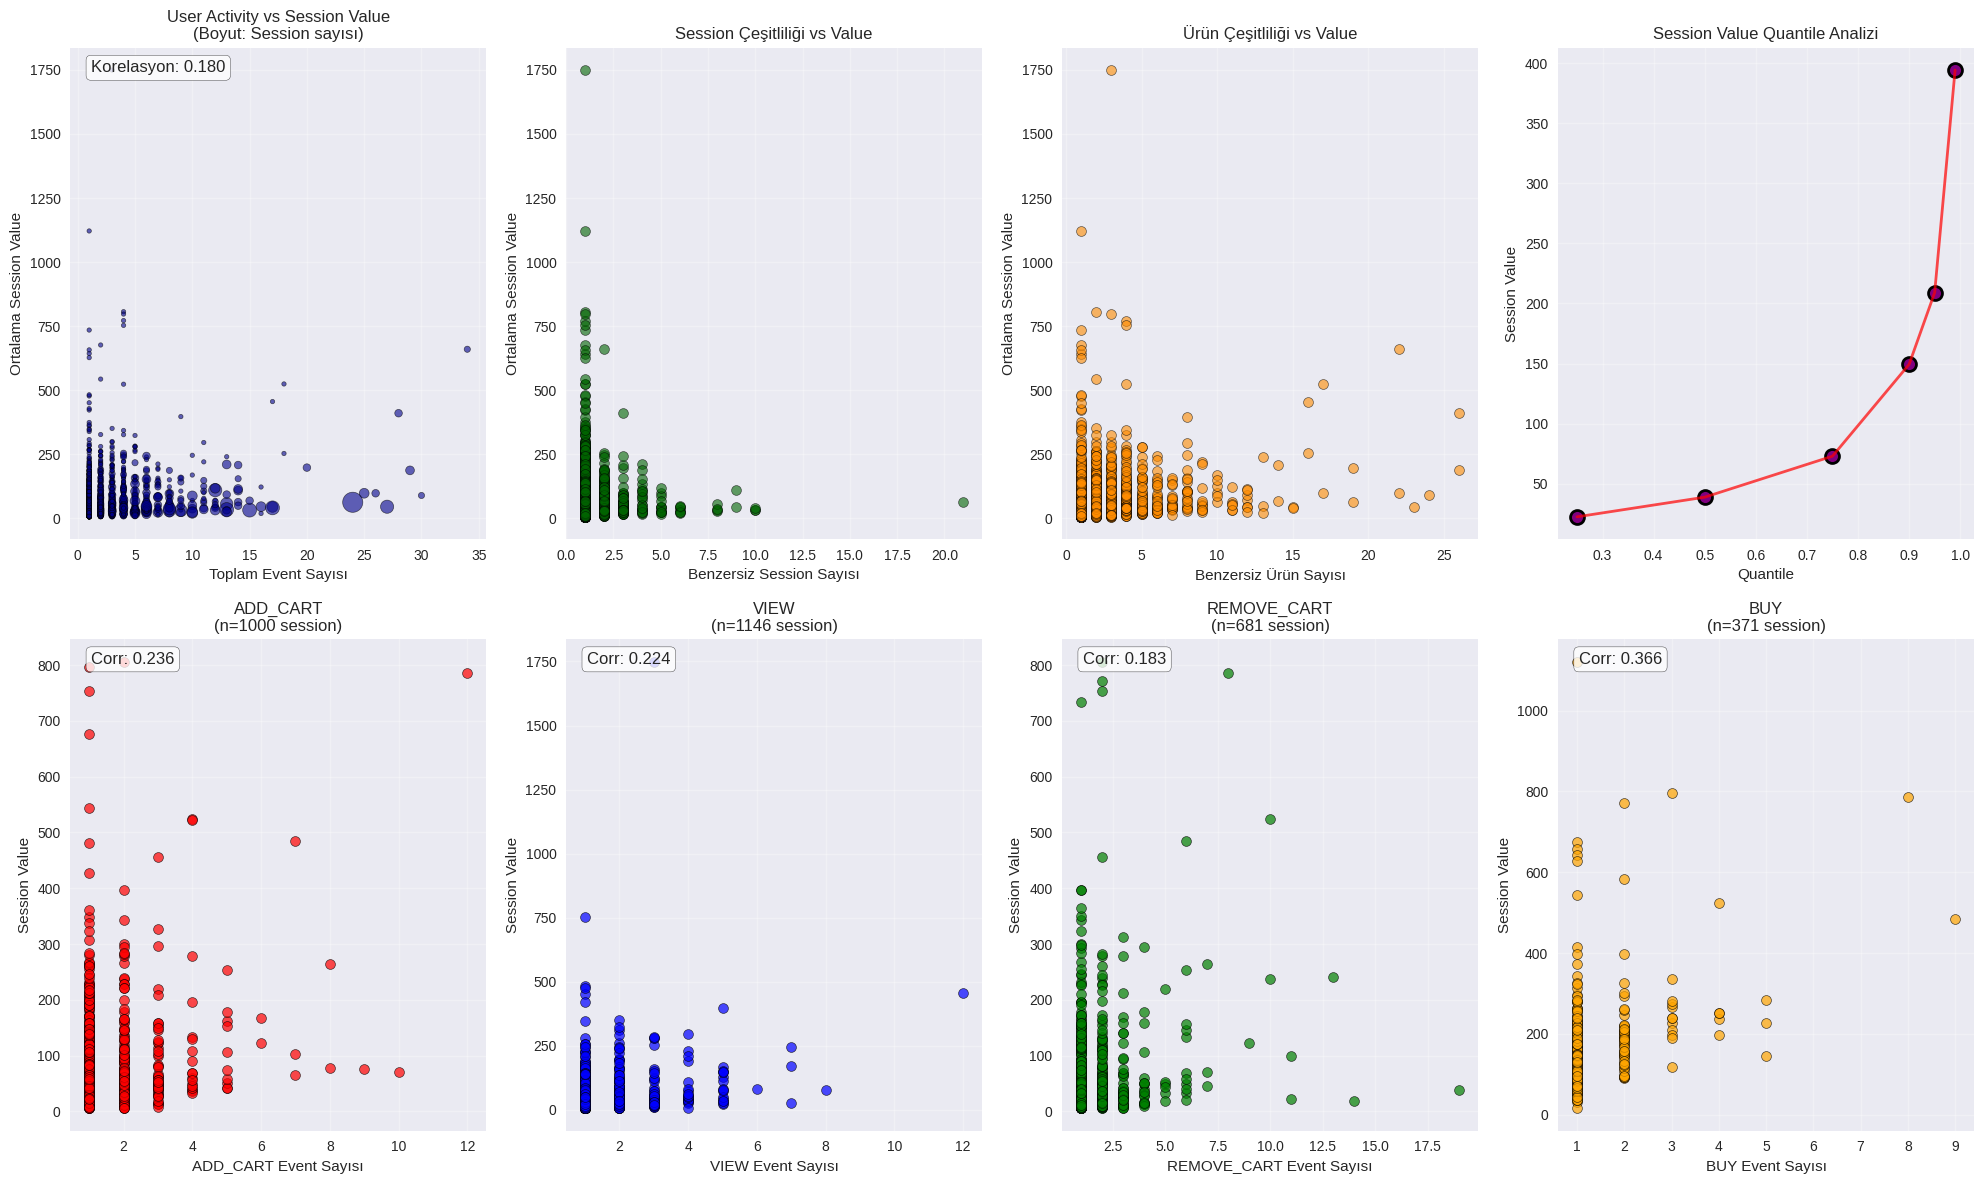

In [19]:
# Detaylı korelasyon analizi
from scipy import stats

# User bazında analiz
user_analysis = cat_00030_data.groupby('user_id').agg({
    'session_value': ['mean', 'std', 'count'],
    'user_session': 'nunique',
    'product_id': 'nunique'
}).reset_index()

user_analysis.columns = ['user_id', 'avg_value', 'std_value', 'total_events', 
                        'unique_sessions', 'unique_products']

plt.figure(figsize=(20, 12))

# Subplot 1: User bazında session value vs activity
plt.subplot(2, 4, 1)
plt.scatter(user_analysis['total_events'], user_analysis['avg_value'], 
           s=user_analysis['unique_sessions']*10, alpha=0.6, 
           color='darkblue', edgecolors='black', linewidth=0.5)
plt.xlabel('Toplam Event Sayısı')
plt.ylabel('Ortalama Session Value')
plt.title('User Activity vs Session Value\n(Boyut: Session sayısı)')
plt.grid(True, alpha=0.3)

# Korelasyon hesapla
corr_user_events = user_analysis['total_events'].corr(user_analysis['avg_value'])
plt.text(0.05, 0.95, f'Korelasyon: {corr_user_events:.3f}', 
         transform=plt.gca().transAxes, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Subplot 2: Session diversity vs value
plt.subplot(2, 4, 2)
plt.scatter(user_analysis['unique_sessions'], user_analysis['avg_value'], 
           alpha=0.6, s=50, color='darkgreen', edgecolors='black', linewidth=0.5)
plt.xlabel('Benzersiz Session Sayısı')
plt.ylabel('Ortalama Session Value')
plt.title('Session Çeşitliliği vs Value')
plt.grid(True, alpha=0.3)

# Subplot 3: Product diversity vs value
plt.subplot(2, 4, 3)
plt.scatter(user_analysis['unique_products'], user_analysis['avg_value'], 
           alpha=0.6, s=50, color='darkorange', edgecolors='black', linewidth=0.5)
plt.xlabel('Benzersiz Ürün Sayısı')
plt.ylabel('Ortalama Session Value')
plt.title('Ürün Çeşitliliği vs Value')
plt.grid(True, alpha=0.3)

# Subplot 4: Session value distribution by quantiles
plt.subplot(2, 4, 4)
quantiles = [0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
quantile_values = [session_agg['session_value'].quantile(q) for q in quantiles]
plt.scatter(quantiles, quantile_values, s=100, color='purple', edgecolors='black', linewidth=2)
plt.plot(quantiles, quantile_values, color='red', alpha=0.7, linewidth=2)
plt.xlabel('Quantile')
plt.ylabel('Session Value')
plt.title('Session Value Quantile Analizi')
plt.grid(True, alpha=0.3)

# Subplot 5-8: Event type bazında detaylı saçılım
event_type_analysis = cat_00030_data.groupby(['event_type', 'user_session']).agg({
    'session_value': 'first'
}).reset_index()

event_types_unique = cat_00030_data['event_type'].unique()
colors_event = ['red', 'blue', 'green', 'orange']

for i, event_type in enumerate(event_types_unique[:4]):
    plt.subplot(2, 4, i+5)
    event_sessions = event_type_analysis[event_type_analysis['event_type'] == event_type]
    
    # Event count per session for this event type
    event_counts = cat_00030_data[cat_00030_data['event_type'] == event_type].groupby('user_session').size()
    merged_data = event_sessions.merge(event_counts.reset_index(), on='user_session')
    merged_data.columns = ['event_type', 'user_session', 'session_value', 'event_count']
    
    plt.scatter(merged_data['event_count'], merged_data['session_value'], 
               alpha=0.7, s=50, color=colors_event[i], 
               edgecolors='black', linewidth=0.5)
    
    plt.xlabel(f'{event_type} Event Sayısı')
    plt.ylabel('Session Value')
    plt.title(f'{event_type}\n(n={len(merged_data)} session)')
    plt.grid(True, alpha=0.3)
    
    # Korelasyon
    if len(merged_data) > 1:
        corr = merged_data['event_count'].corr(merged_data['session_value'])
        plt.text(0.05, 0.95, f'Corr: {corr:.3f}', 
                transform=plt.gca().transAxes, 
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

## 7. Son Özet ve Önemli Bulgular

In [20]:
# Final özet analizi ve önemli bulgular
print("=" * 80)
print("CAT_00030 KATEGORİSİ ve SESSION_VALUE İLİŞKİSİ - ÖZET RAPOR")
print("=" * 80)

# Temel istatistikler
total_cat_events = len(cat_00030_data)
total_sessions = len(session_agg)
total_users = cat_00030_data['user_id'].nunique()
total_products = cat_00030_data['product_id'].nunique()

print(f"\n📊 TEMEL İSTATİSTİKLER:")
print(f"   • Toplam CAT_00030 eventi: {total_cat_events:,}")
print(f"   • Benzersiz session sayısı: {total_sessions:,}")
print(f"   • Benzersiz kullanıcı sayısı: {total_users:,}")
print(f"   • Benzersiz ürün sayısı: {total_products:,}")

# Session value istatistikleri
avg_value = session_agg['session_value'].mean()
median_value = session_agg['session_value'].median()
std_value = session_agg['session_value'].std()
min_value = session_agg['session_value'].min()
max_value = session_agg['session_value'].max()

print(f"\n💰 SESSION VALUE ANALİZİ:")
print(f"   • Ortalama session value: {avg_value:.2f}")
print(f"   • Medyan session value: {median_value:.2f}")
print(f"   • Standart sapma: {std_value:.2f}")
print(f"   • Minimum value: {min_value:.2f}")
print(f"   • Maximum value: {max_value:.2f}")
print(f"   • Değişkenlik katsayısı: {(std_value/avg_value)*100:.1f}%")

# Korelasyon analizi
corr_events = session_agg['event_count'].corr(session_agg['session_value'])
corr_products = session_agg['unique_products'].corr(session_agg['session_value'])

print(f"\n🔗 KORELASYON ANALİZİ:")
print(f"   • Event sayısı vs Session value: {corr_events:.3f}")
print(f"   • Ürün çeşitliliği vs Session value: {corr_products:.3f}")

# Event type dağılımı
event_dist = cat_00030_data['event_type'].value_counts()
print(f"\n📋 EVENT TYPE DAĞILIMI:")
for event_type, count in event_dist.items():
    percentage = (count / total_cat_events) * 100
    print(f"   • {event_type}: {count:,} (%{percentage:.1f})")

# En değerli sessionlar
top_sessions = session_agg.nlargest(5, 'session_value')
print(f"\n🏆 EN YÜKSEK VALUE'LU 5 SESSION:")
for i, (_, session) in enumerate(top_sessions.iterrows(), 1):
    print(f"   {i}. Session: {session['user_session']}, Value: {session['session_value']:.2f}, Events: {session['event_count']}")

# En popüler ürünler
top_products_final = popular_products.head(5)
print(f"\n🛍️ EN YÜKSEK ORTALAMA VALUE'LU 5 ÜRÜN:")
for i, (_, product) in enumerate(top_products_final.iterrows(), 1):
    print(f"   {i}. {product['product_id']}: Avg {product['avg_value']:.2f}, Events: {product['event_count']}")

# Value kategorileri
value_cats = session_agg['value_category'].value_counts()
print(f"\n📊 SESSION VALUE KATEGORİLERİ:")
for category, count in value_cats.items():
    percentage = (count / len(session_agg)) * 100
    print(f"   • {category}: {count:,} session (%{percentage:.1f})")

# Önemli bulgular
print(f"\n🔍 ÖNEMLİ BULGULAR:")
print(f"   • Session value ile event sayısı arasında {'pozitif' if corr_events > 0 else 'negatif'} korelasyon var")
print(f"   • {'Yüksek' if std_value > avg_value else 'Düşük'} değişkenlik gözleniyor (CV: {(std_value/avg_value)*100:.1f}%)")
print(f"   • En yaygın event type: {event_dist.index[0]} (%{(event_dist.iloc[0]/total_cat_events)*100:.1f})")
print(f"   • Ortalama session başına event sayısı: {session_agg['event_count'].mean():.1f}")
print(f"   • Ortalama session başına ürün çeşitliliği: {session_agg['unique_products'].mean():.1f}")

print("\n" + "="*80)
print("Analiz tamamlandı! Grafiklerdeki detaylar için yukarıdaki hücreleri inceleyin.")
print("="*80)

CAT_00030 KATEGORİSİ ve SESSION_VALUE İLİŞKİSİ - ÖZET RAPOR

📊 TEMEL İSTATİSTİKLER:
   • Toplam CAT_00030 eventi: 4,660
   • Benzersiz session sayısı: 2,511
   • Benzersiz kullanıcı sayısı: 1,938
   • Benzersiz ürün sayısı: 387

💰 SESSION VALUE ANALİZİ:
   • Ortalama session value: 65.75
   • Medyan session value: 38.71
   • Standart sapma: 88.61
   • Minimum value: 5.38
   • Maximum value: 1749.42
   • Değişkenlik katsayısı: 134.8%

🔗 KORELASYON ANALİZİ:
   • Event sayısı vs Session value: 0.263
   • Ürün çeşitliliği vs Session value: 0.255

📋 EVENT TYPE DAĞILIMI:
   • VIEW: 1,570 (%33.7)
   • ADD_CART: 1,449 (%31.1)
   • REMOVE_CART: 1,148 (%24.6)
   • BUY: 493 (%10.6)

🏆 EN YÜKSEK VALUE'LU 5 SESSION:
   1. Session: SESSION_165310, Value: 1749.42, Events: 3
   2. Session: SESSION_061199, Value: 1121.30, Events: 1
   3. Session: SESSION_110695, Value: 806.15, Events: 4
   4. Session: SESSION_013098, Value: 796.99, Events: 4
   5. Session: SESSION_059246, Value: 786.25, Events: 28

🛍️ 

KeyError: 'value_category'